In [93]:
#IMPORTS
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from scipy import stats


In [94]:
#READ CSVS
trainingData = pd.read_csv('/Users/maykalnik/ML-7641-Team14-main/dataset/output/dataset_mar_23/new_train.csv')
validationData = pd.read_csv('/Users/maykalnik/ML-7641-Team14-main/dataset/output/dataset_mar_23/new_val.csv')
print(trainingData.columns)

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4',
       'num_sub', 'trending_date', 'tags', 'views per day', 'likes per day',
       'dislikes per day', 'comments per day', 'thumbnail_link', 'rating',
       'description', 'trending'],
      dtype='object')


In [95]:
#TRAINING DATA
trainingX = trainingData[['cate_0', 'cate_1', 'cate_2', 'cate_3','cate_4', 'num_sub', 'views per day','likes per day', 'dislikes per day', 'comments per day', 'rating']]
trainingY = trainingData['trending']

trendingTrainingX = trainingX.to_numpy()[np.where(trainingY.to_numpy()==1)[0]]


In [96]:
#VALIDATION DATA
valX = validationData[['cate_0', 'cate_1', 'cate_2', 'cate_3','cate_4', 'num_sub', 'views per day','likes per day', 'dislikes per day', 'comments per day', 'rating']].to_numpy()
actual = validationData[['trending']]

In [97]:
#NORMALIZE DATA
trendingTrainingX[:, 7:10] = trendingTrainingX[:, 7:10] / trendingTrainingX[:, [6]]
trendingTrainingX = (trendingTrainingX - np.mean(trendingTrainingX, axis=0)) / np.std(trendingTrainingX, axis=0)


valX[:, 7:10] = valX[:, 7:10] / valX[:, [6]]
valX = (valX - np.mean(valX, axis=0)) / np.std(valX, axis=0)



In [98]:
#FIT MODEL

clf = OneClassSVM(gamma='auto')

clf.fit(trendingTrainingX)
pred = clf.predict(valX)
pred = np.where(pred == -1, 0, 1)

actual = actual.to_numpy().flatten()

#metrics
accuracy = sk.metrics.accuracy_score(actual, pred)
precision = sk.metrics.precision_score(actual, pred)
recall = sk.metrics.recall_score(actual, pred)
fOne = sk.metrics.f1_score(actual, pred)



#print("actual: ", actual)
#print("predicted: ", pred)
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", fOne)


accuracy:  0.5767097966728281
precision:  0.5721271393643031
recall:  0.4526112185686654
F1:  0.5053995680345572


In [99]:

with open("SVM_val_pred.txt", "w") as file:
    file.write(np.array2string(pred, threshold=np.inf))


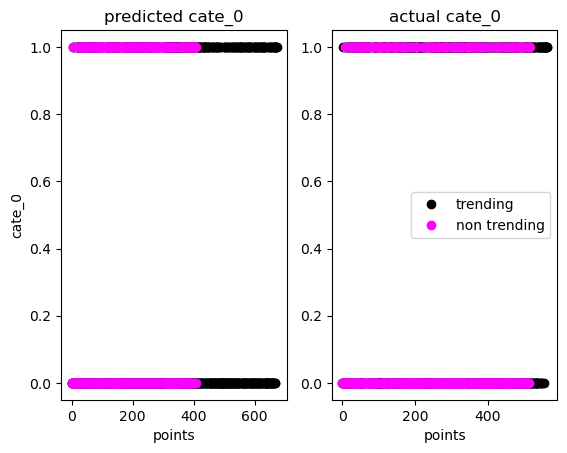

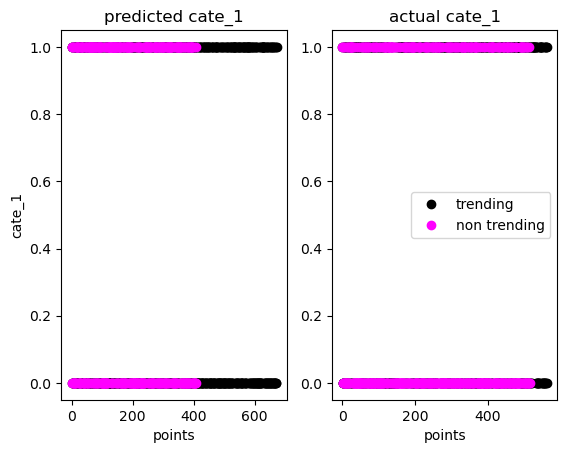

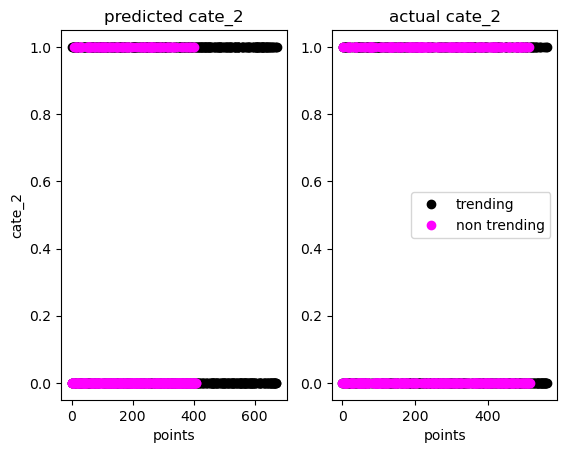

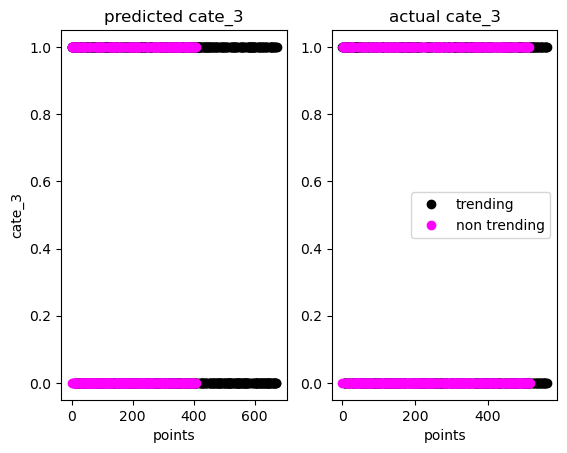

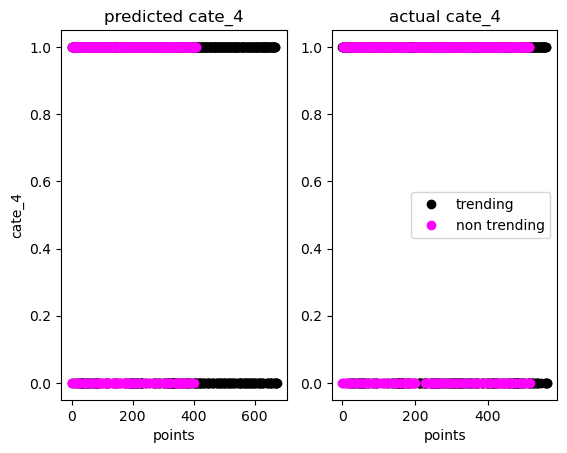

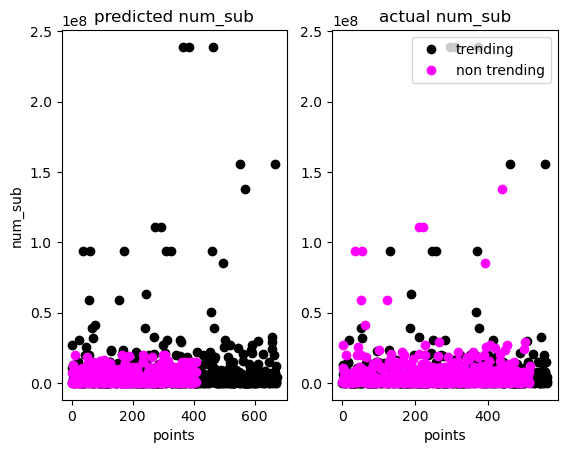

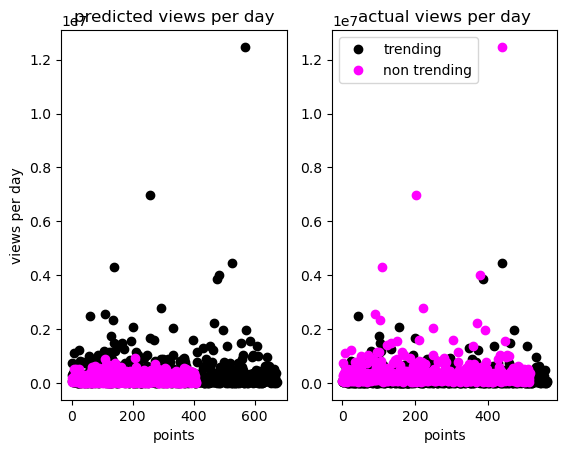

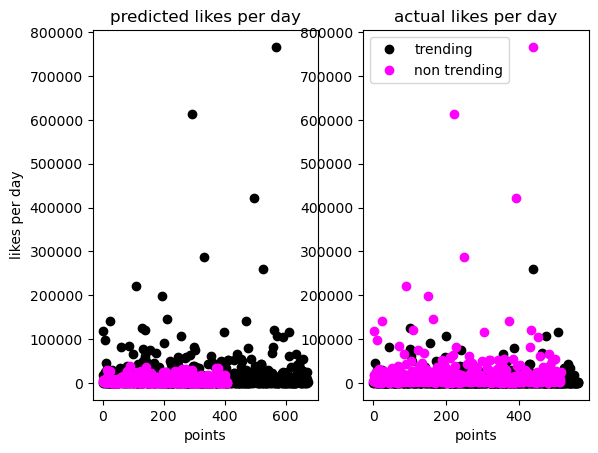

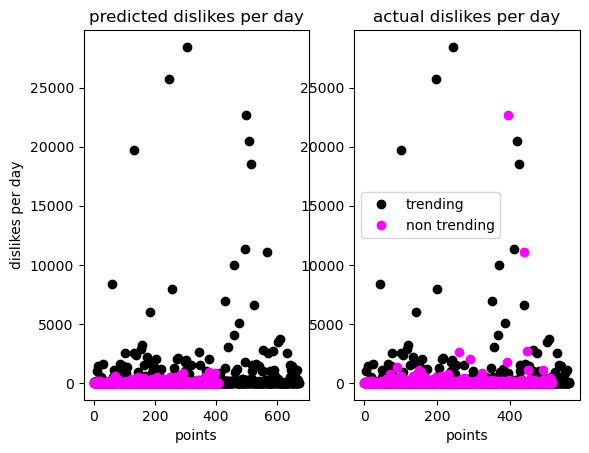

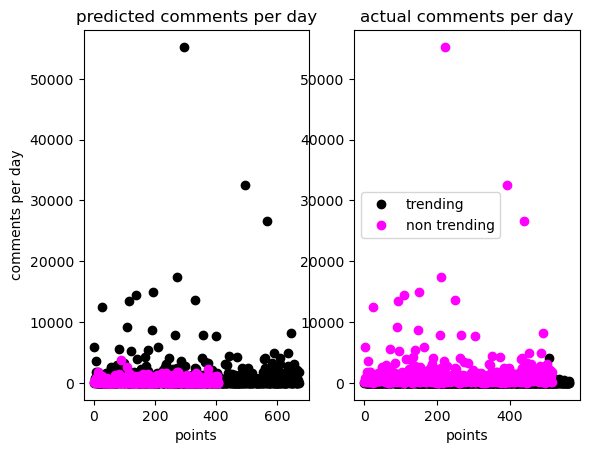

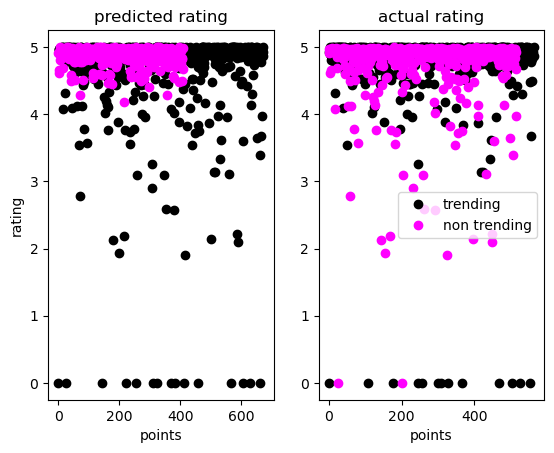

In [100]:
#GRAPHING ACTUAL VS PRED

features = [6,7,8,9,10,11,14,15,16,17,19]

for i in range (len(features)):
# Plot 1: predicted
    plt.subplot(1, 2, 1) 
    # trending testing
    points = validationData.to_numpy()[np.where(pred == 0)[0]]
    plt.plot(points[:, features[i]], 'o', color="black", label = 'trending')

    # non trending testing
    points = validationData.to_numpy()[np.where(pred == 1)[0]]
    plt.plot(points[:, features[i]],'o', color="magenta", label = 'non trending')
    
    
    plt.title("predicted " + trainingData.columns[features[i]])
    plt.ylabel(trainingData.columns[features[i]])
    plt.xlabel("points")
    

# Plot 2: actual
    plt.subplot(1, 2, 2) 
    #trending testing
    points = validationData.to_numpy()[np.where(actual == 0)[0]]
    plt.plot(points[:, features[i]], 'o', color="black", label = 'trending')

    # non trending testing
    points = validationData.to_numpy()[np.where(actual == 1)[0]]
    plt.plot(points[:, features[i]],'o', color="magenta", label = 'non trending')
    
    plt.title("actual " + trainingData.columns[features[i]])
    plt.xlabel("points")
    plt.legend()
    plt.show()

    

In [101]:

#NORMALIZE AND DIMENTION REDUCTION
trainingXX = trainingX.to_numpy()
trainingXX = np.where(trainingXX==0, .001, trainingX)
for i in range (len(trainingX.columns)):
    trainingXX [:, i], a = stats.boxcox(trainingXX[:,i], lmbda=None)

pca = PCA(n_components=2, random_state=100)
pca.fit(trainingXX)
clfPCA = pca.transform(trainingXX)



In [102]:
#Correct Classifcations

features = [6,7,8,9,10,11,14,15,16,17,19]
a = actual.to_numpy().flatten()

for i in range (len(features)):
# Plot 1: predicted
    # correct testing
    points = validationData.to_numpy()[np.where(pred == a)[0]]
    print(len(points))
    plt.plot(points[:, features[i]], 'o', color="green", label = 'correct')

    # non trending testing
    points = validationData.to_numpy()[np.where(pred != a)[0]]
    print(len(points))
    plt.plot(points[:, features[i]],'o', color="red", label = 'incorrect')
    
    
    plt.title("predicted " + trainingData.columns[features[i]])
    plt.ylabel(trainingData.columns[features[i]])
    plt.xlabel("points")
    plt.legend()
    plt.show()

    

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

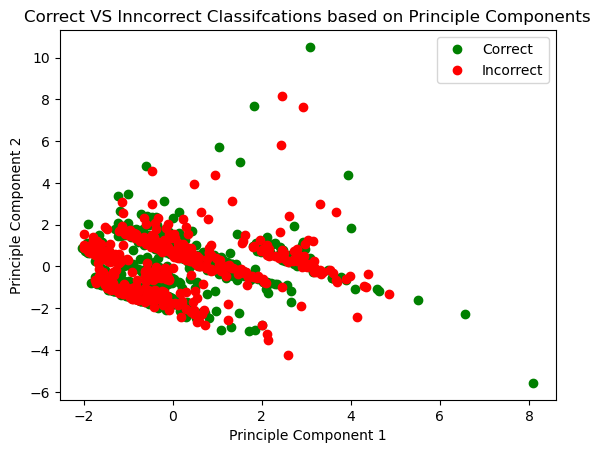

In [ ]:
pca = PCA(n_components=2, random_state=100)
pca.fit(trendingTrainingX)
clfPCA = pca.transform(trendingTrainingX)
a = actual.to_numpy().flatten()
plt.plot(clfPCA[np.where(a == pred)[0], 0], clfPCA[np.where(a == pred)[0], 1],'o', color="green", label = 'Correct')

plt.plot(clfPCA[np.where(a != pred)[0], 0], clfPCA[np.where(a != pred)[0], 1],'o', color="red", label = 'Incorrect')
plt.title("Correct VS Inncorrect Classifcations based on Principle Components")
plt.ylabel("Principle Component 2")
plt.xlabel("Principle Component 1")
plt.legend()
plt.show()


In [ ]:
features = [6,7,8,9,10,11,14,15,16,17,19]
print(validationData.columns[features])

Index(['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4', 'num_sub',
       'views per day', 'likes per day', 'dislikes per day',
       'comments per day', 'rating'],
      dtype='object')


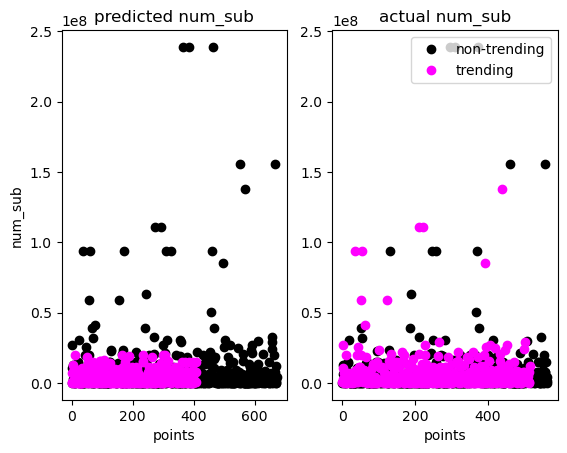

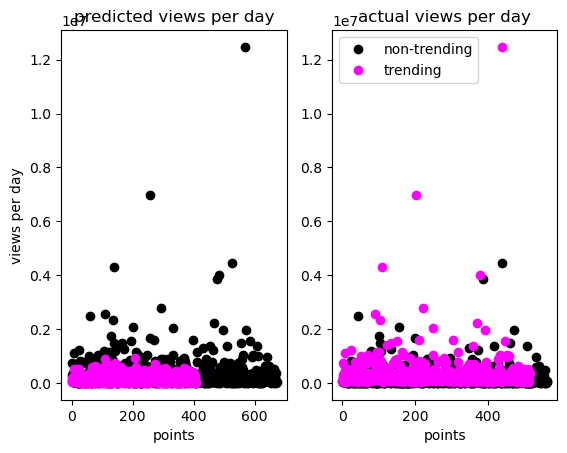

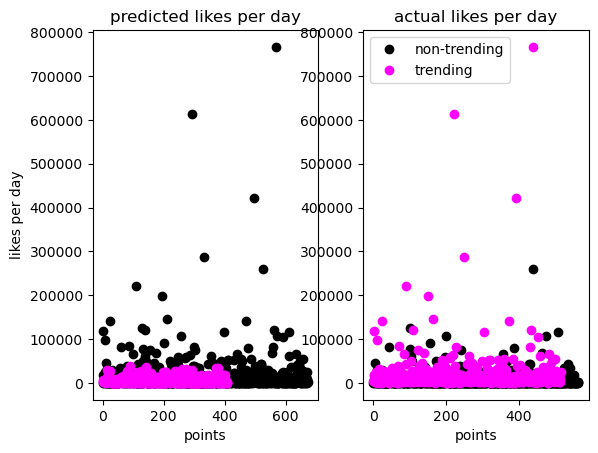

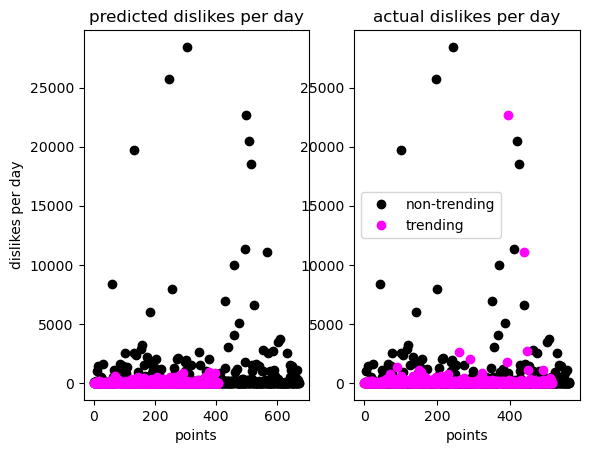

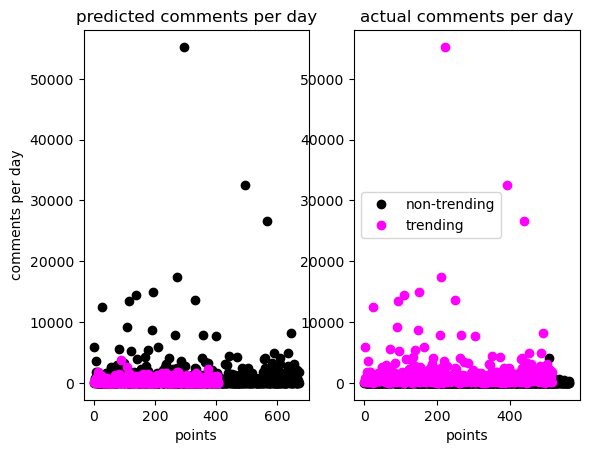

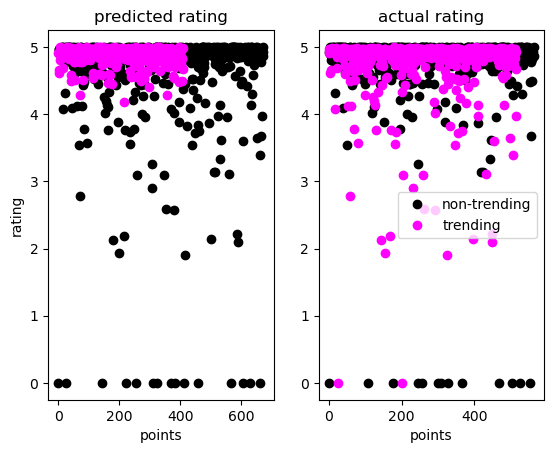

In [ ]:
features = [11,14,15,16,17,19]

upperLimits =[5e7, 3e6, 1e5, 4000, 8000, 5]

for i in range (len(features)):
# Plot 1: predicted
    plt.subplot(1, 2, 1) 
    # trending testing
    points = validationData.to_numpy()[np.where(pred == 0)[0]]
    plt.plot(points[:, features[i]], 'o', color="black", label = 'non-trending')

    # non trending testing
    points = validationData.to_numpy()[np.where(pred == 1)[0]]
    plt.plot(points[:, features[i]],'o', color="magenta", label = 'trending')
    
    
    plt.title("predicted " + trainingData.columns[features[i]])
    plt.ylabel(trainingData.columns[features[i]])
    plt.xlabel("points")
    #plt.ylim(0, upperLimits[i])
    

# Plot 2: actual
    plt.subplot(1, 2, 2) 
    #trending testing
    points = validationData.to_numpy()[np.where(actual == 0)[0]]
    plt.plot(points[:, features[i]], 'o', color="black", label = 'non-trending')

    # non trending testing
    points = validationData.to_numpy()[np.where(actual == 1)[0]]
    plt.plot(points[:, features[i]],'o', color="magenta", label = 'trending')
    
    plt.title("actual " + trainingData.columns[features[i]])
    plt.xlabel("points")
    #plt.ylim(0, upperLimits[i])
    plt.legend()
    plt.show()

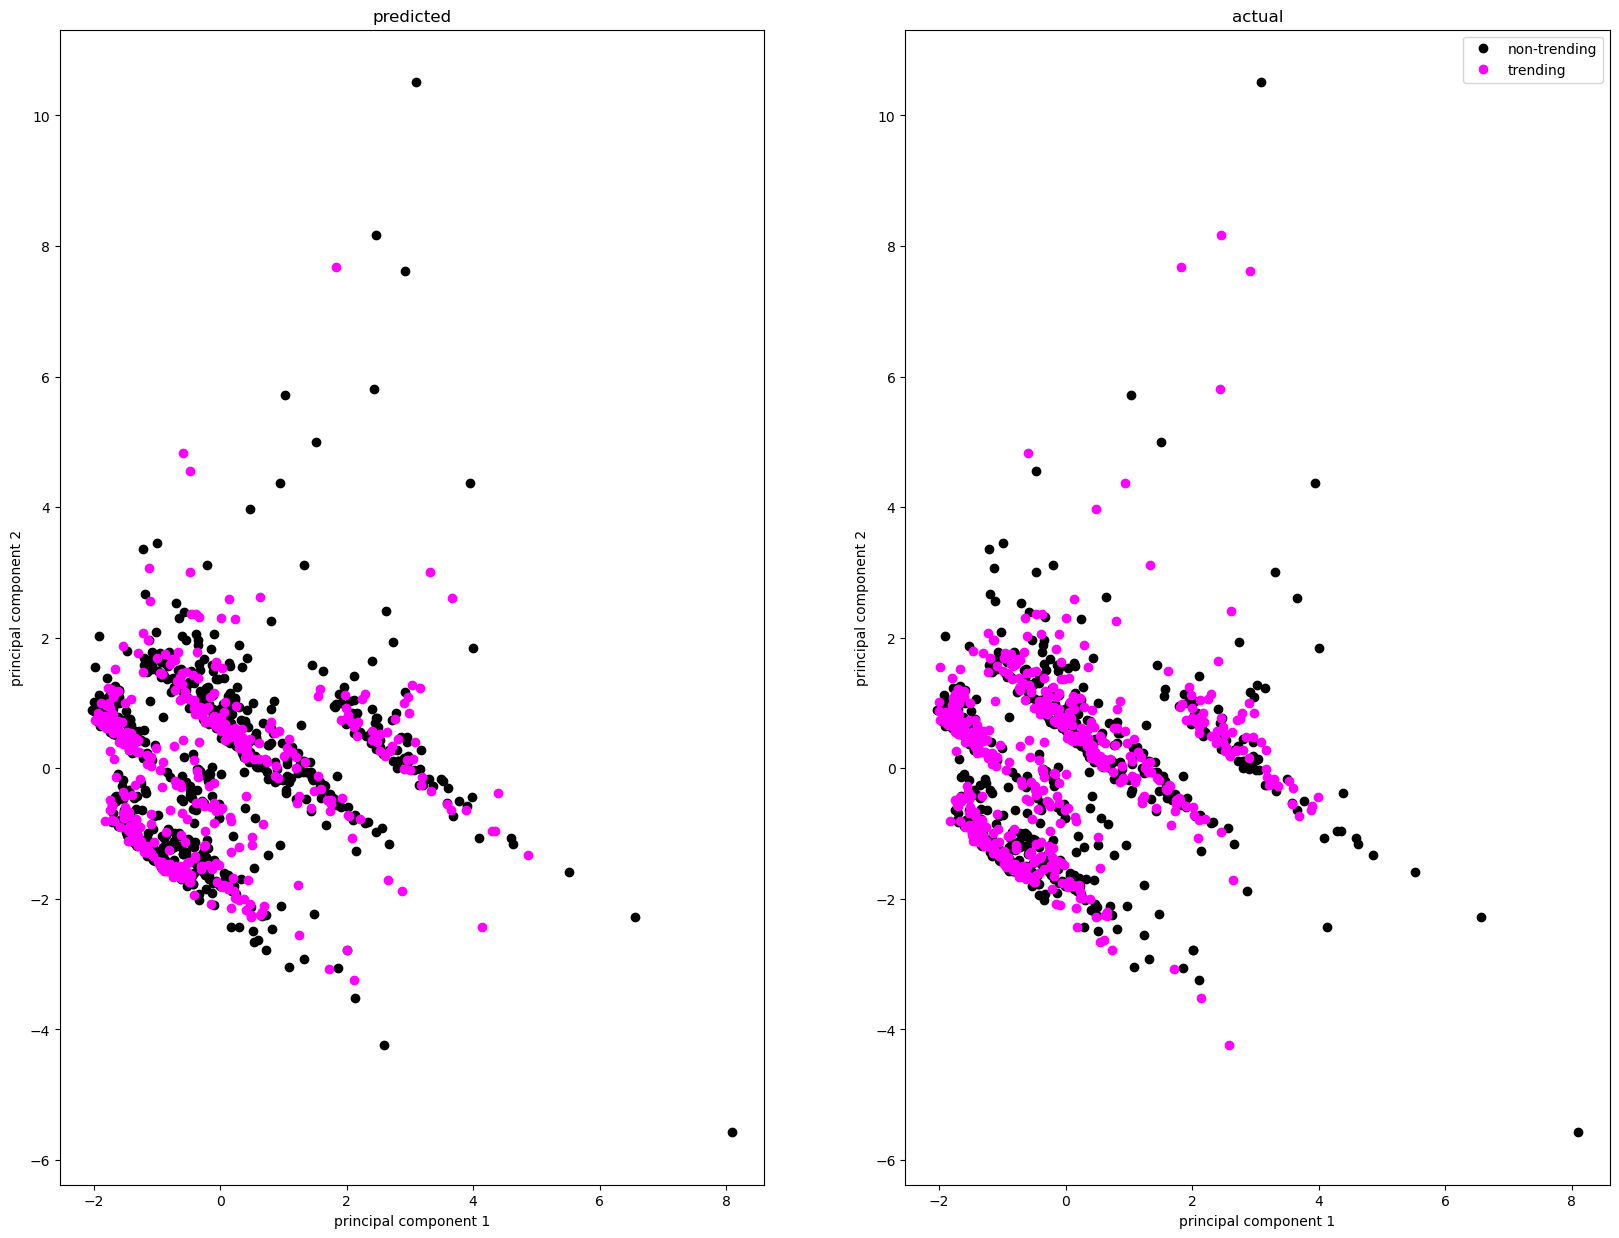

In [ ]:

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
# Plot 1: predicted
plt.subplot(1, 2, 1) 
# trending 
plt.plot(clfPCA[np.where(pred == 0)[0], 0], clfPCA[np.where(pred == 0)[0], 1],'o', color="black", label = 'trending')
# non-trending
plt.plot(clfPCA[np.where(pred == 1)[0], 0], clfPCA[np.where(pred == 1)[0], 1],'o', color="magenta", label = 'non- trending')

plt.title("predicted")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

# Plot 2: actual
plt.subplot(1, 2, 2) 
# trending 
plt.plot(clfPCA[np.where(actual == 0)[0], 0], clfPCA[np.where(actual == 0)[0], 1],'o', color="black", label = 'trending')
# non-trending
plt.plot(clfPCA[np.where(actual == 1)[0], 0], clfPCA[np.where(actual == 1)[0], 1],'o', color="magenta", label = 'non- trending')

plt.title("actual")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
    
plt.legend(["non-trending", "trending"])
plt.show()

    